In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
terrdf = pd.read_excel("gtd_cleaned_data.xlsx")


In [3]:
terrdf.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,apprx_start_date,apprx_end_date,idate
0,0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,...,Unknown,-99,0,0,0,0,NaN,NaT,NaT,1970-07-02
1,1,197000000002,1970,1,1,NaN,0,NaT,130,Mexico,...,Unknown,-99,0,1,1,1,NaN,NaT,NaT,1970-01-01
2,2,197001000001,1970,1,1,NaN,0,NaT,160,Philippines,...,Unknown,-99,-9,-9,1,1,NaN,NaT,NaT,1970-01-01
3,3,197001000002,1970,1,1,NaN,0,NaT,78,Greece,...,Unknown,-99,-9,-9,1,1,NaN,NaT,NaT,1970-01-01
4,4,197001000003,1970,1,1,NaN,0,NaT,101,Japan,...,Unknown,-99,-9,-9,1,1,NaN,NaT,NaT,1970-01-01


In [4]:
terrdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          209706 non-null  int64         
 1   eventid             209706 non-null  int64         
 2   iyear               209706 non-null  int64         
 3   imonth              209706 non-null  int64         
 4   iday                209706 non-null  int64         
 5   approxdate          12689 non-null   object        
 6   extended            209706 non-null  int64         
 7   resolution          4861 non-null    datetime64[ns]
 8   country             209706 non-null  int64         
 9   country_txt         209706 non-null  object        
 10  region              209706 non-null  int64         
 11  region_txt          209706 non-null  object        
 12  provstate           209706 non-null  object        
 13  city                209706 no

In [5]:
terrdf_grp_by_date = terrdf.groupby(terrdf.idate.dt.year)

In [6]:
terrdf_by_date = terrdf_grp_by_date.eventid.count()

In [7]:
terrdf_by_date = pd.DataFrame({'terr_events':terrdf_by_date}, index=terrdf_by_date.index)

In [8]:
terrdf_by_date["rolling_mean"] = terrdf_by_date.terr_events.rolling(2).mean()

In [9]:
terrdf_by_date.head()

,terr_events,rolling_mean
idate,,
1970,651,NaN
1971,471,561.0
1972,567,519.0
1973,473,520.0
1974,581,527.0


In [10]:
terrdf_by_date.index

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020],
      dtype='int32', name='idate')

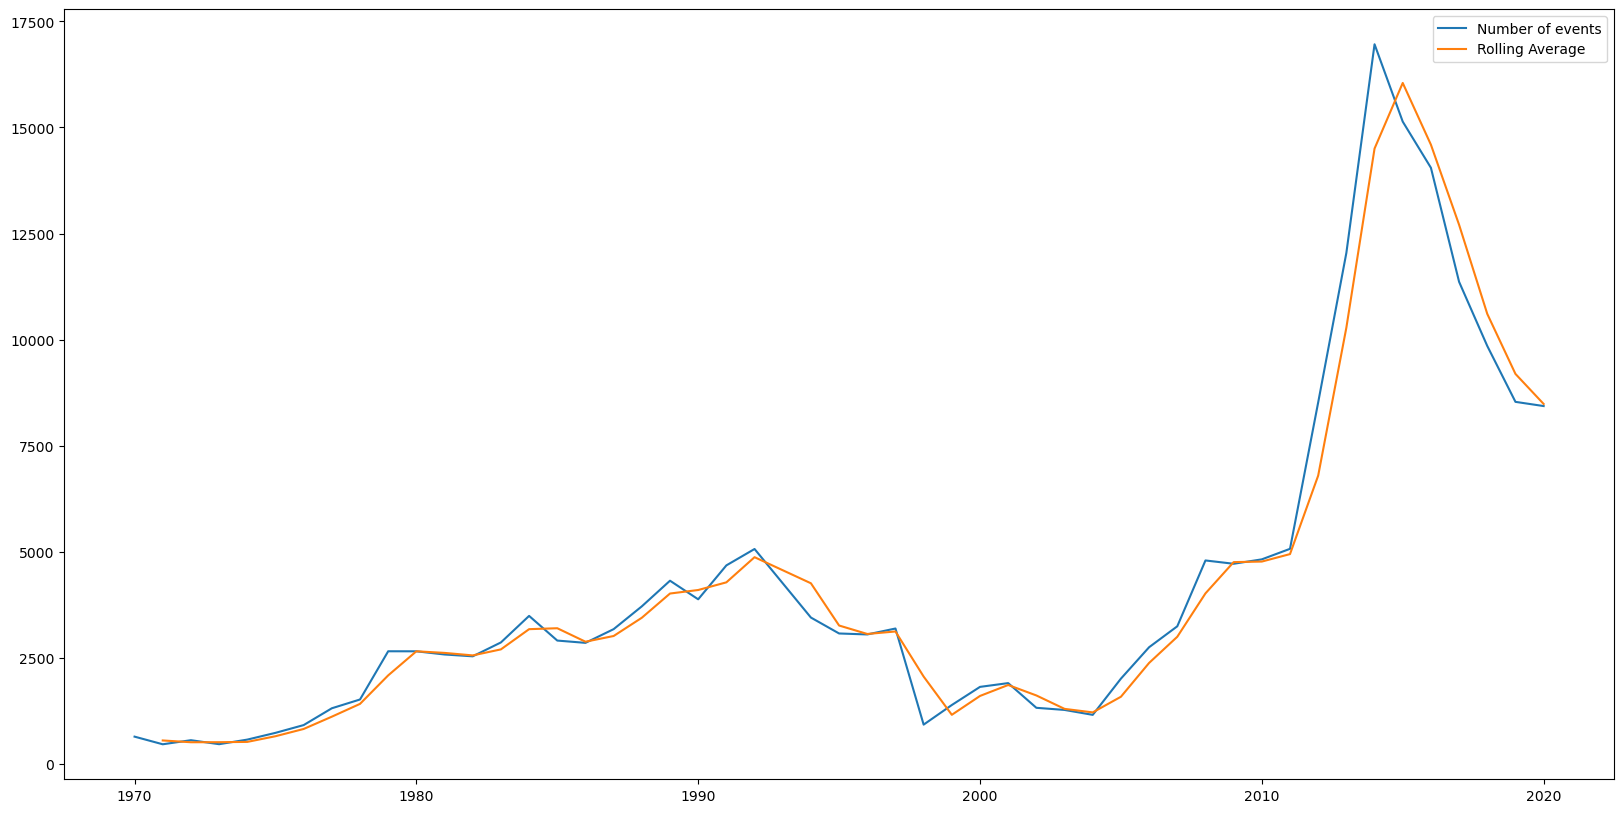

In [11]:
# Number of events per year
plt.figure(figsize=(20,10))
plt.plot(terrdf_by_date.index, terrdf_by_date.terr_events, label="Number of events")
plt.plot(terrdf_by_date.index, terrdf_by_date.rolling_mean, label="Rolling Average")
plt.legend()
plt.show()

In [12]:
terrdf_grp_by_region = terrdf.groupby(terrdf.region_txt)

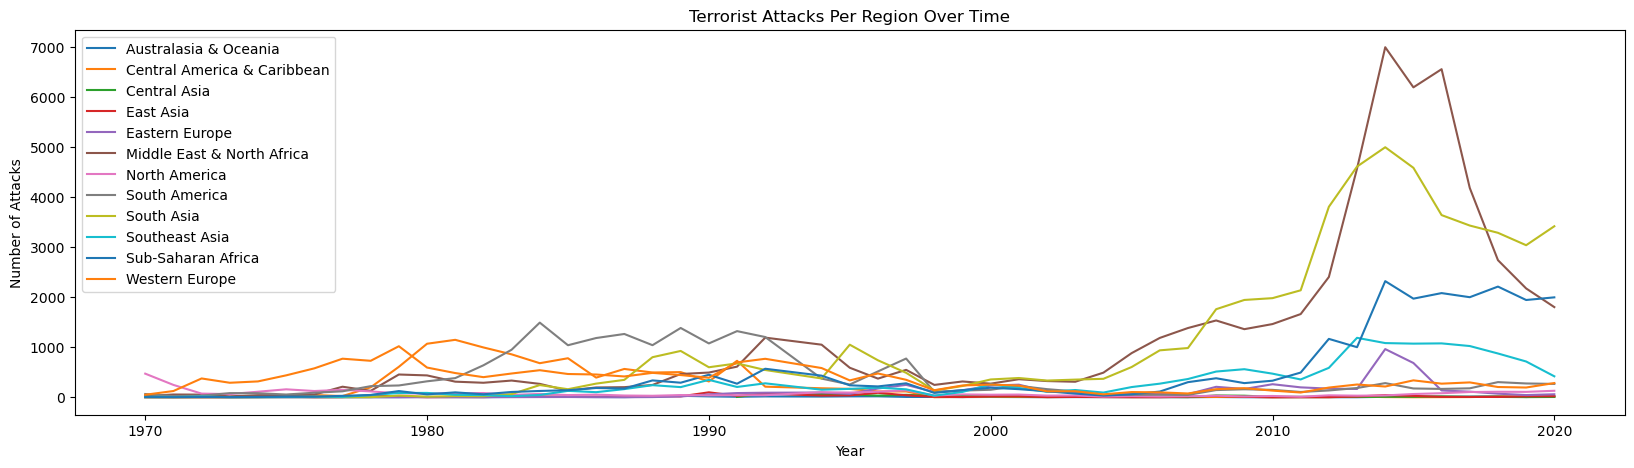

In [13]:
# Terrorist attacks per regoin

plt.figure(figsize=(20,5))

for region, regiondf in terrdf_grp_by_region:
    # Group by year and count a specific column, e.g., 'id' or another column
    regiondf_by_date = regiondf.groupby(regiondf.idate.dt.year).count()['eventid']
    
    plt.plot(regiondf_by_date.index, regiondf_by_date, label=region)

plt.legend()
plt.title("Terrorist Attacks Per Region Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()


In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
terrdf_80to90 = terrdf.loc[(terrdf.idate.dt.year >= 1980) & (terrdf.idate.dt.year < 1989)]

terr_atks_by_month_80to90 = terrdf_80to90.groupby([terrdf_80to90.idate.dt.year, terrdf_80to90.idate.dt.month])['eventid'].count()

terr_atks_by_month_80to90.index = pd.date_range(start='1980-01', periods=len(terr_atks_by_month_80to90), freq='M')

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(terr_atks_by_month_80to90)
print(f"ADF Statistic : {adf_result[0]}")
print(f"p-value : {adf_result[1]}")

if adf_result[1] < 0.05:
    print("Stationary.")
else:
    print("Non-stationary")

ADF Statistic : -4.570560649685724
p-value : 0.00014630748157904157
Stationary.


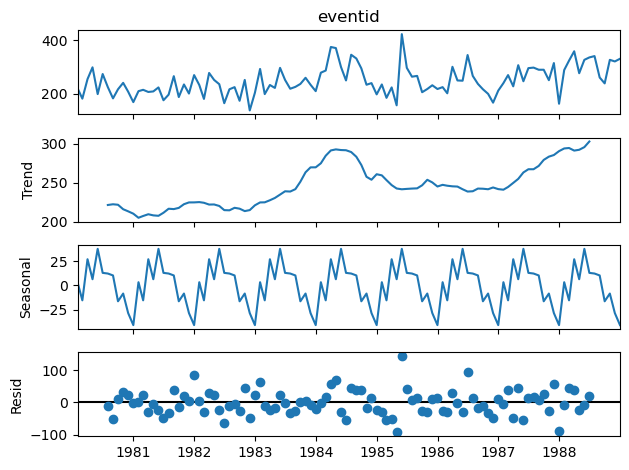

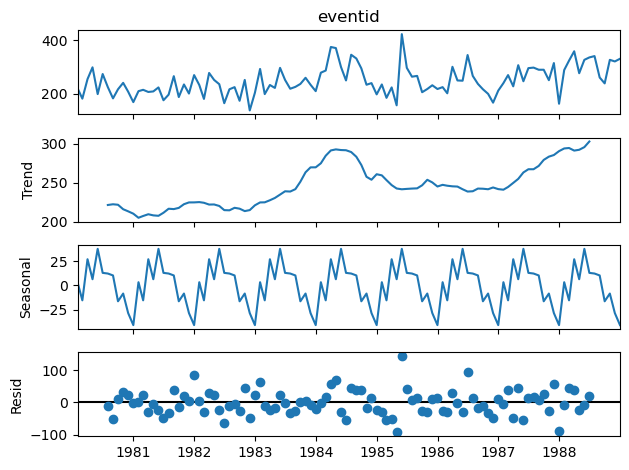

In [15]:
# plot decomposition
decomposition = seasonal_decompose(terr_atks_by_month_80to90, model='additive')

decomposition.plot()

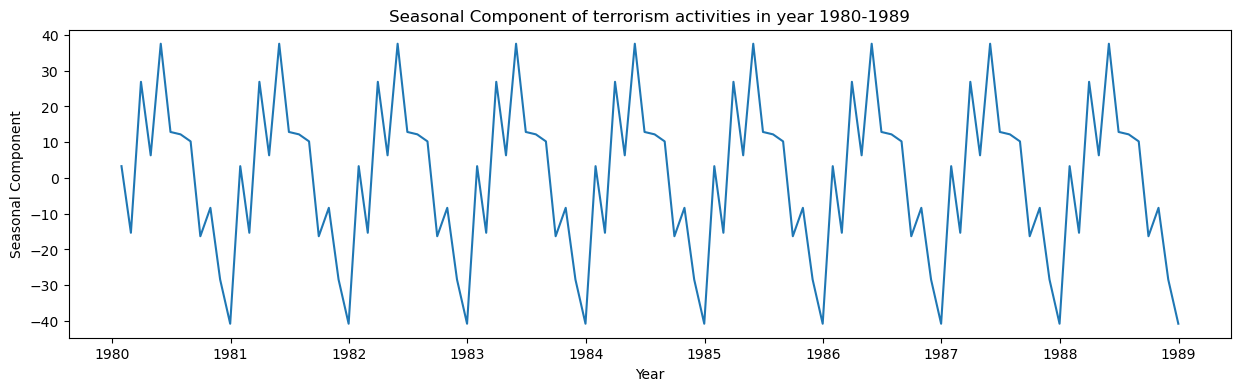

In [16]:
# Seasonality
plt.figure(figsize=(15, 4))
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component of terrorism activities in year 1980-1989')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.show()


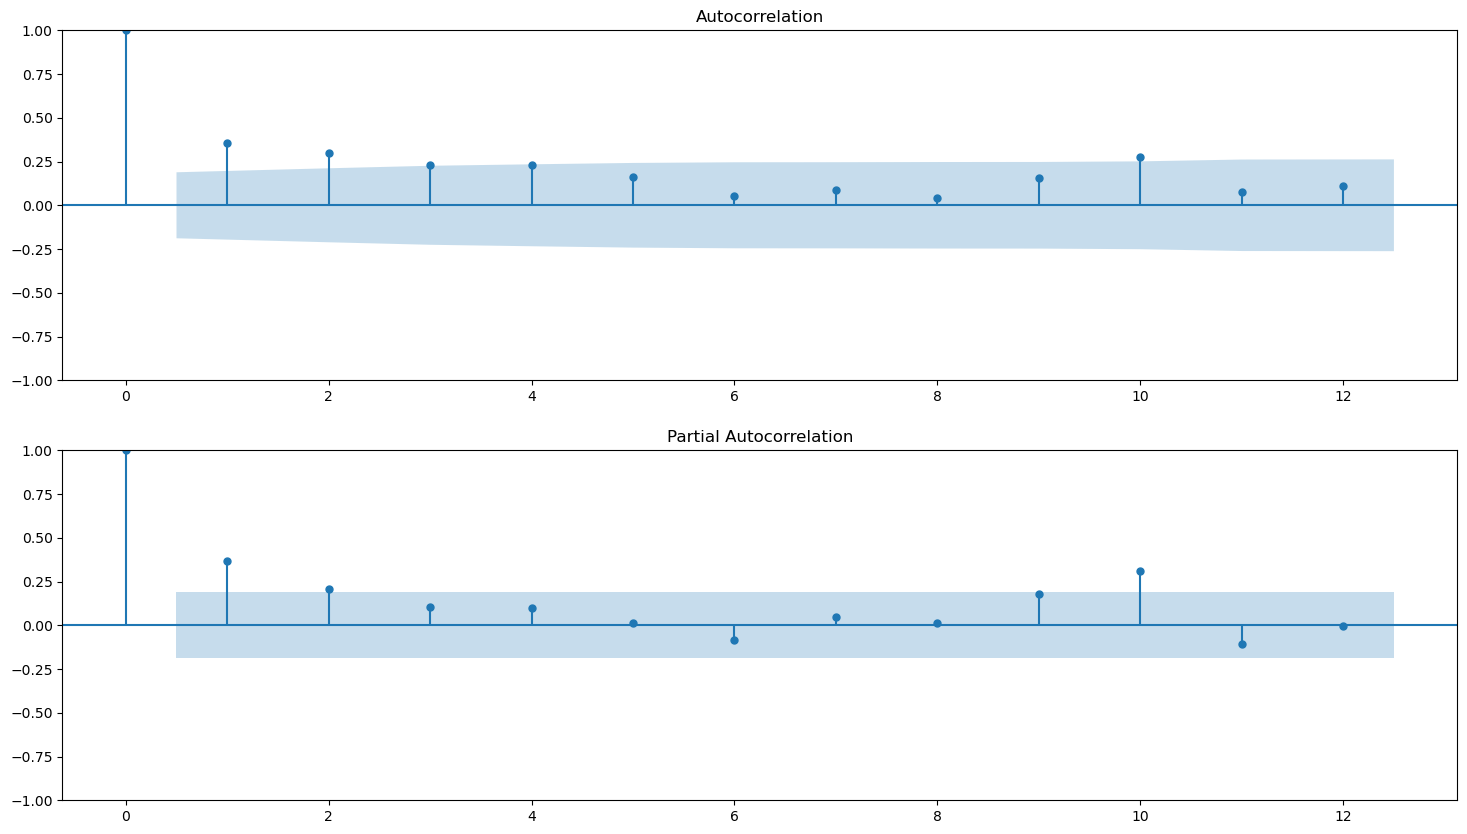

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
plot_acf(terr_atks_by_month_80to90,lags=12, ax=ax[0])
plot_pacf(terr_atks_by_month_80to90,lags=12, ax=ax[1], method='ols')

# plt.tight_layout()
plt.show()

In [18]:
# Using SARIMAX and ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

p,d,q,m = 1,1,1,12


model_sarimax = SARIMAX(terr_atks_by_month_80to90, 
                order=(p, d, q), 
                seasonal_order=(p, d, q, m))

model_arima = ARIMA(terr_atks_by_month_80to90, order=(1, 1, 1))

In [19]:
model_fit_sarimax = model_sarimax.fit(disp=False)
model_fit_arima = model_arima.fit()

C:\Users\kunal\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
# Forecast the next 5 years (60 months)
n_months = 5 * 12
forecast_sarimax = model_fit_sarimax.get_forecast(steps=n_months)
forecast_arima = model_fit_arima.get_forecast(steps=n_months)

In [21]:
# Create date index for the forecast
forecast_index = pd.date_range(start=pd.to_datetime("1990-01-01"), periods=n_months+1, freq='M')[1:]

In [22]:
# Convert the forecast to a Pandas Series
forecast_series_sarimax = pd.Series(forecast_sarimax.predicted_mean.values, index=forecast_index)
forecast_series_arima = pd.Series(forecast_arima.predicted_mean.values, index=forecast_index)

# Get confidence intervals
confidence_intervals_sarimax = forecast_sarimax.conf_int()
confidence_intervals_arima = forecast_arima.conf_int()

In [23]:
# Real Values for 1990 - 1995
terrdf_90to95 = terrdf.loc[(terrdf.idate.dt.year >= 1990) & (terrdf.idate.dt.year <= 1995)]

terr_atks_by_month_90to95 = terrdf_90to95.groupby([terrdf_90to95.idate.dt.year, terrdf_90to95.idate.dt.month])['eventid'].count()

terr_atks_by_month_90to95.index = pd.date_range(start='1990-01', periods=len(terr_atks_by_month_90to95), freq='M')

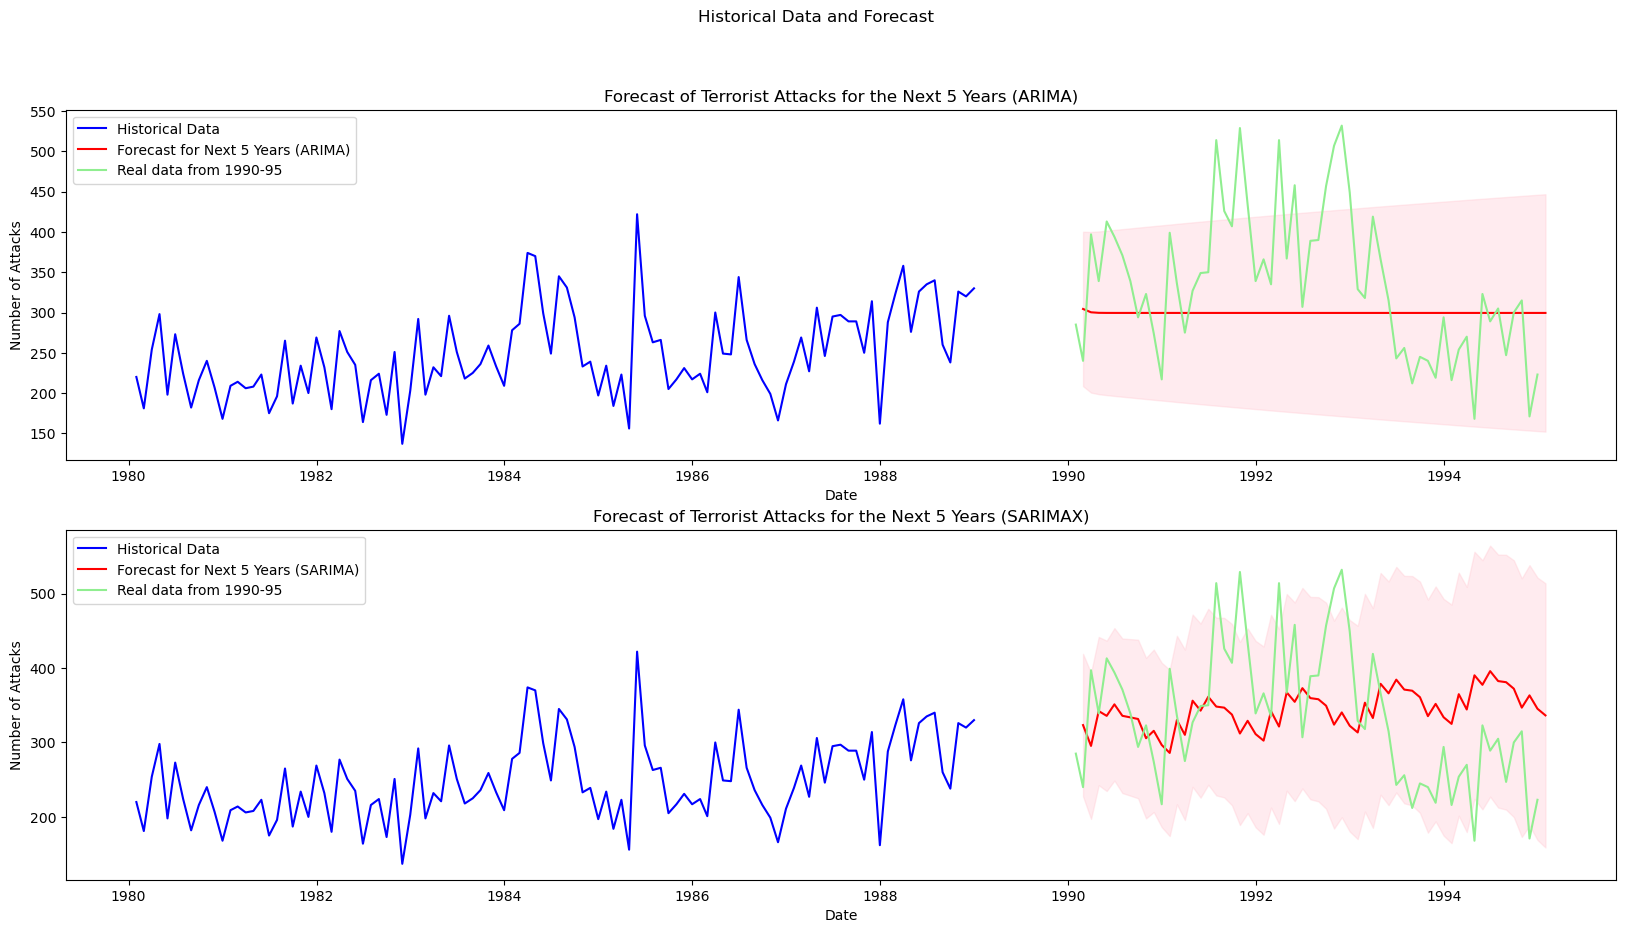

In [24]:
# Plotting the historical data and the forecast for ARIMA and SARIMAX
fig, axs = plt.subplots(2, 1, figsize=(20, 10))  # Increase figsize for wider plots
fig.suptitle("Historical Data and Forecast")

axs[0].plot(terr_atks_by_month_80to90, label='Historical Data', color='blue')
axs[0].plot(forecast_series_arima, label='Forecast for Next 5 Years (ARIMA)', color='red')
axs[0].plot(terr_atks_by_month_90to95, label='Real data from 1990-95', color='lightgreen')
axs[0].fill_between(forecast_index, confidence_intervals_arima.iloc[:, 0], confidence_intervals_arima.iloc[:, 1], color='pink', alpha=0.3)
axs[0].set_title('Forecast of Terrorist Attacks for the Next 5 Years (ARIMA)')
axs[0].set(xlabel='Date', ylabel='Number of Attacks')
axs[0].legend()

axs[1].plot(terr_atks_by_month_80to90, label='Historical Data', color='blue')
axs[1].plot(forecast_series_sarimax, label='Forecast for Next 5 Years (SARIMA)', color='red')
axs[1].plot(terr_atks_by_month_90to95, label='Real data from 1990-95', color='lightgreen')
axs[1].fill_between(forecast_index, confidence_intervals_sarimax.iloc[:, 0], confidence_intervals_sarimax.iloc[:, 1], color='pink', alpha=0.3)
axs[1].set_title('Forecast of Terrorist Attacks for the Next 5 Years (SARIMAX)')
axs[1].set(xlabel='Date', ylabel='Number of Attacks')
axs[1].legend()

plt.show()

In [25]:
# Target analysis
terrdf_grp_by_target = terrdf.groupby(by="targtype1_txt")
terr_by_target = terrdf_grp_by_target[['eventid']].count()
terr_by_target.reset_index(inplace=True)
terr_by_target.sort_values(by="eventid", ascending=False, inplace=True)

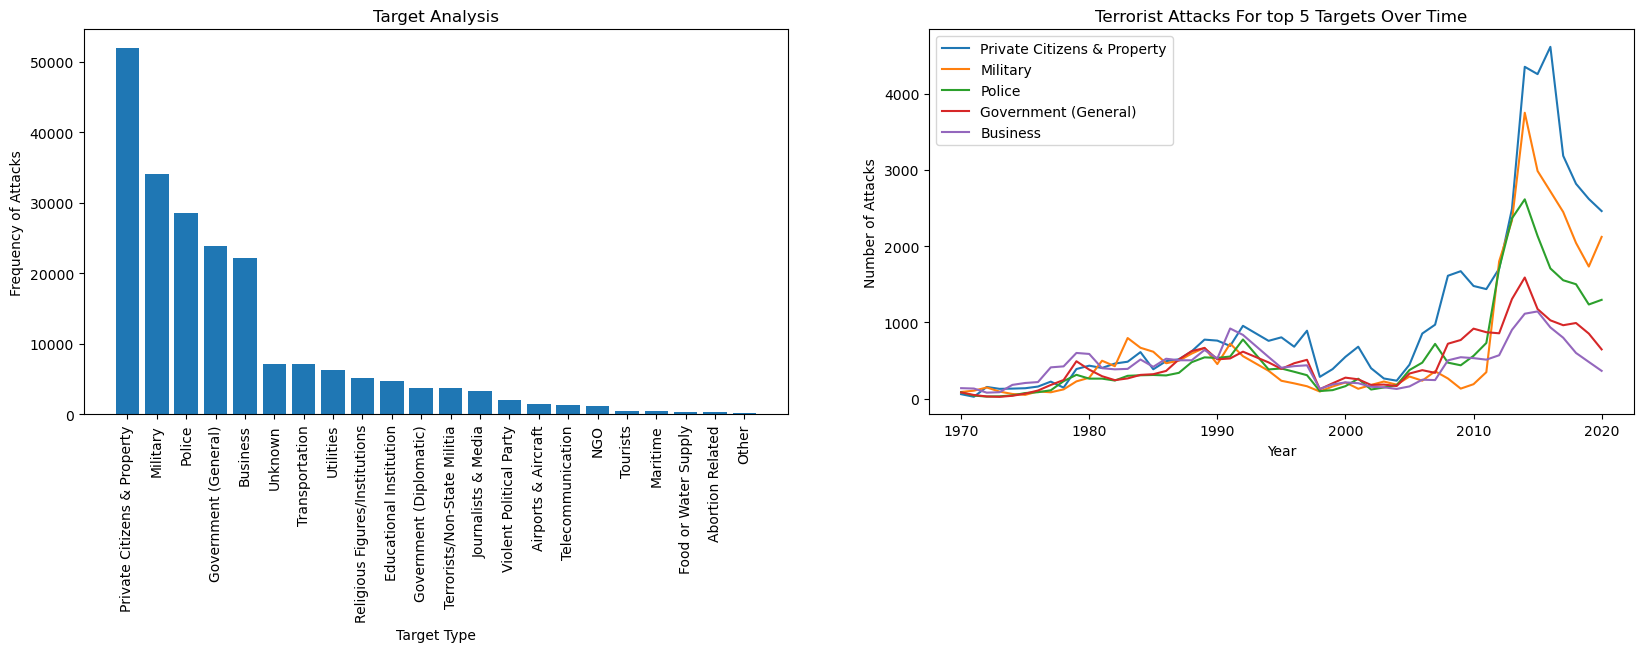

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Target analysis
axs[0].bar(terr_by_target.targtype1_txt, terr_by_target.eventid)
axs[0].set_title("Target Analysis")
axs[0].set(xlabel="Target Type", ylabel="Frequency of Attacks")
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Trend of attacks for top 5 targets
for target in terr_by_target.targtype1_txt[:5]:
    targdf = terrdf[terrdf['targtype1_txt'] == target]
    targdf_by_date = targdf.groupby(targdf['idate'].dt.year).count()['eventid']
    
    axs[1].plot(targdf_by_date.index, targdf_by_date, label=target)

axs[1].set_title("Terrorist Attacks For top 5 Targets Over Time")
axs[1].set(xlabel="Year", ylabel="Number of Attacks")
axs[1].legend()

plt.show()

The top 5 attack targets are Private Citizens & Property, Military, Police, Government (General) and Business

In [27]:
# Checking Independence of Terrorist Groups, Weapon types and Target Type
from scipy.stats import chi2_contingency

# Relation Between Terrorist Groups and Weapon types
print("\n","-"*20,"Relation Between Terrorist Groups and Weapon types","-"*20)
crosstab = pd.crosstab(terrdf["gname"], terrdf['weaptype1_txt'])
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(crosstab)
print(f"Chi-square: {chi2:.2f}, p-value: {pval:.4f}, Degrees of Freedom: {degrees_of_freedom}")
# Interpretation
if pval < 0.05:
    print("Reject null hypothesis: There's a significant association between Terrorist Groups and Weapon Type (p < 0.05).")
else:
    print("Fail to reject null hypothesis: Terrorist Groups and Weapon Type might be independent (p >= 0.05).")

# Relation Between Terrorist Groups and Target types
print("\n","-"*20,"Relation Between Terrorist Groups and Target types","-"*20)
crosstab = pd.crosstab(terrdf["gname"], terrdf['targtype1_txt'])
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(crosstab)
print(f"Chi-square: {chi2:.2f}, p-value: {pval:.4f}, Degrees of Freedom: {degrees_of_freedom}")
# Interpretation
if pval < 0.05:
    print("Reject null hypothesis: There's a significant association between Terrorist Groups and Target Type (p < 0.05).")
else:
    print("Fail to reject null hypothesis: Terrorist Groups and Target Type might be independent (p >= 0.05).")

# Relation Between Region and Attack Types
print("\n","-"*20,"Relation Between Region and Attack Types","-"*20)
crosstab = pd.crosstab(terrdf["region"], terrdf['attacktype1_txt'])
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(crosstab)
print(f"Chi-square: {chi2:.2f}, p-value: {pval:.4f}, Degrees of Freedom: {degrees_of_freedom}")
# Interpretation
if pval < 0.05:
    print("Reject null hypothesis: There's a significant association Between Region and Attack Types (p < 0.05).")
else:
    print("Fail to reject null hypothesis: Region and Attack Types might be independent (p >= 0.05).")

# Relation Between Terrorist Groups and Attack Types
print("\n","-"*20,"Relation Between Terrorist Groups and Attack Types","-"*20)
crosstab = pd.crosstab(terrdf["gname"], terrdf['attacktype1_txt'])
chi2, pval, degrees_of_freedom, expected_counts = chi2_contingency(crosstab)
print(f"Chi-square: {chi2:.2f}, p-value: {pval:.4f}, Degrees of Freedom: {degrees_of_freedom}")
# Interpretation
if pval < 0.05:
    print("Reject null hypothesis: There's a significant association Between Terrorist Groups and Attack Types (p < 0.05).")
else:
    print("Fail to reject null hypothesis: Terrorist Groups and Attack Types might be independent (p >= 0.05).")




 -------------------- Relation Between Terrorist Groups and Weapon types --------------------
Chi-square: 304632.96, p-value: 0.0000, Degrees of Freedom: 40964
Reject null hypothesis: There's a significant association between Terrorist Groups and Weapon Type (p < 0.05).

 -------------------- Relation Between Terrorist Groups and Target types --------------------
Chi-square: 503471.52, p-value: 0.0000, Degrees of Freedom: 78204
Reject null hypothesis: There's a significant association between Terrorist Groups and Target Type (p < 0.05).

 -------------------- Relation Between Region and Attack Types --------------------
Chi-square: 27464.87, p-value: 0.0000, Degrees of Freedom: 88
Reject null hypothesis: There's a significant association Between Region and Attack Types (p < 0.05).

 -------------------- Relation Between Terrorist Groups and Attack Types --------------------
Chi-square: 175820.01, p-value: 0.0000, Degrees of Freedom: 29792
Reject null hypothesis: There's a significant 

In [28]:
# Relation between numeric columns
terr_numeric_values = terrdf[['nperps', 'nkill', 'nkillter', 'nwound', 'nwoundte']]

terr_numeric_values = terr_numeric_values.loc[(terr_numeric_values.nperps >= 0) & (terr_numeric_values.nkill >= 0) & (terr_numeric_values.nkillter >= 0) & (terr_numeric_values.nwound >= 0) & (terr_numeric_values.nwoundte >= 0) ]

In [29]:
terr_numeric_values.corr()

,nperps,nkill,nkillter,nwound,nwoundte
nperps,1.000000,0.066485,0.202151,0.000353,0.196992
nkill,0.066485,1.000000,0.297413,0.811016,0.208136
nkillter,0.202151,0.297413,1.000000,0.033670,0.795413
nwound,0.000353,0.811016,0.033670,1.000000,0.017300
nwoundte,0.196992,0.208136,0.795413,0.017300,1.000000


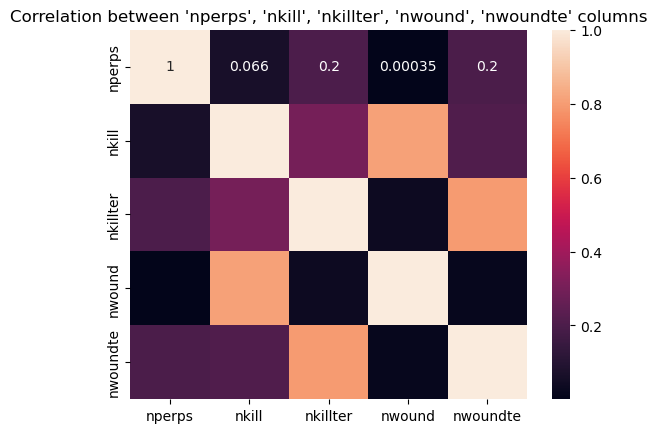

In [30]:
import seaborn as sns
sns.heatmap(data = terr_numeric_values.corr(), annot=True)
plt.title("Correlation between 'nperps', 'nkill', 'nkillter', 'nwound', 'nwoundte' columns")
plt.show()

C:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

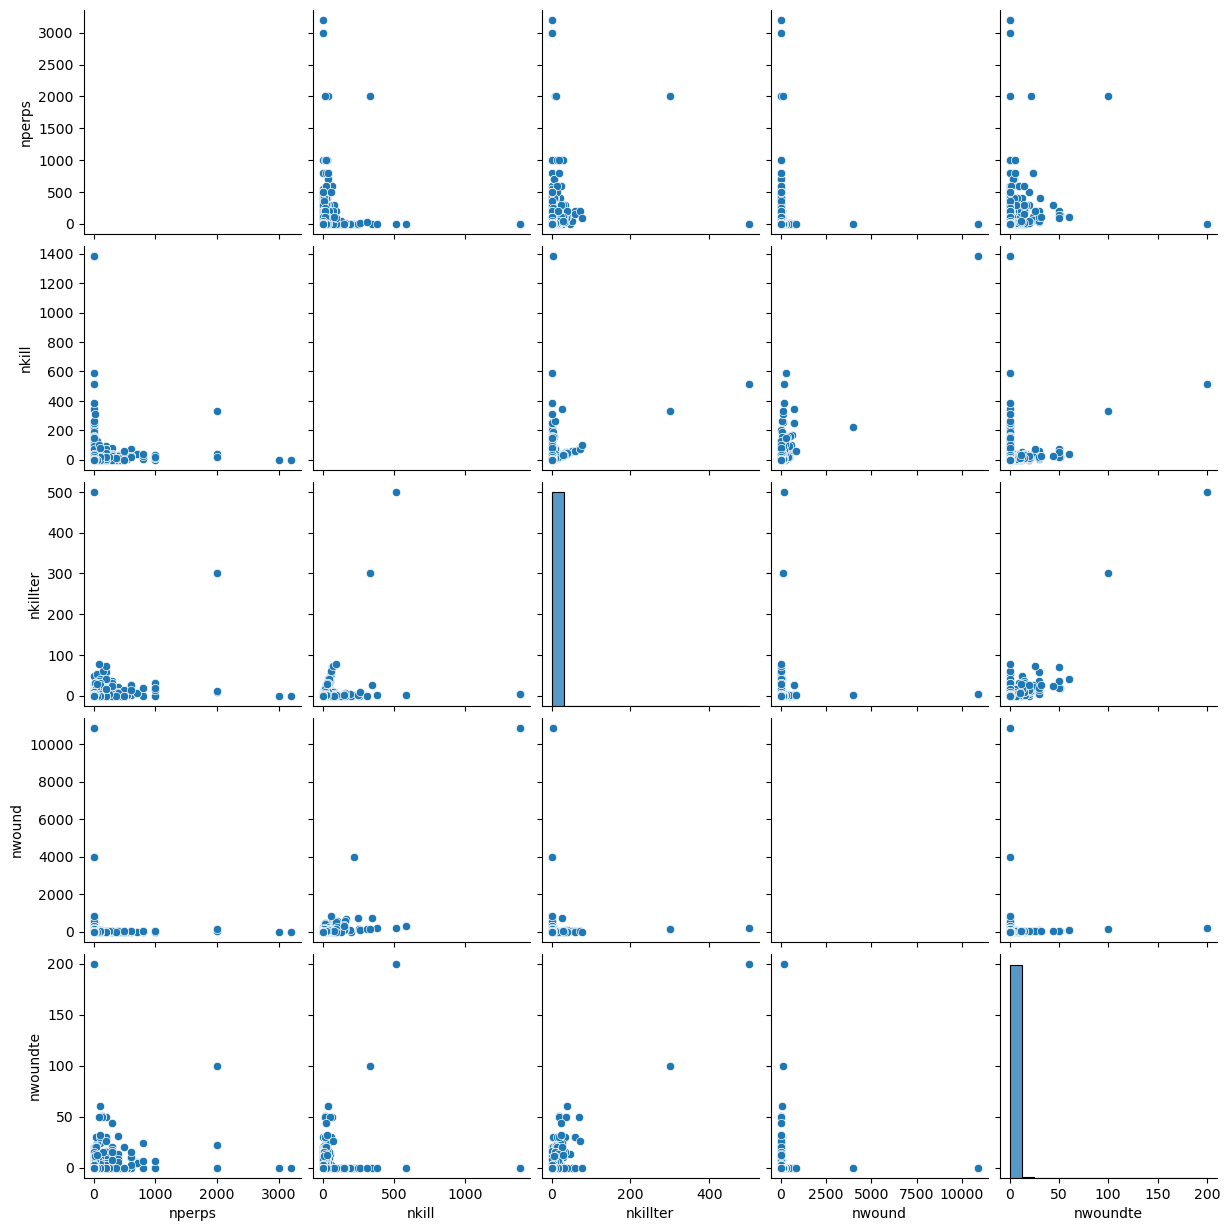

In [31]:
sns.pairplot(terr_numeric_values)
plt.show()

In [32]:
# Distribution of frequency of attacks per month
terr_atks_by_month = terrdf.groupby([terrdf.idate.dt.year, terrdf.idate.dt.month])['eventid'].count()
mean_attacks = terr_atks_by_month.mean()
median_attacks = terr_atks_by_month.median()
skewness_attacks = terr_atks_by_month.skew()
kurtosis_attacks = terr_atks_by_month.kurt()

C:\Users\kunal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


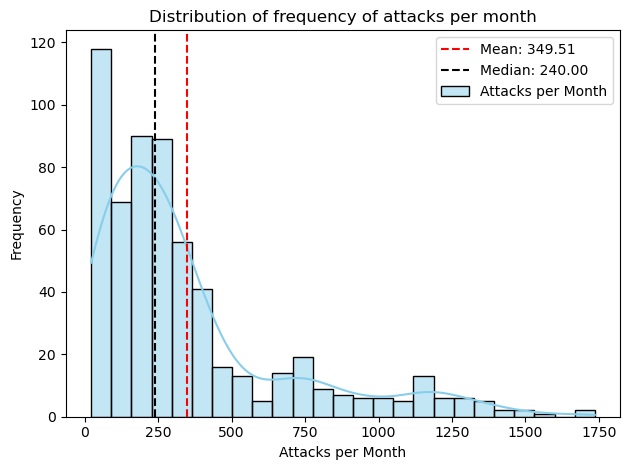

Mean : 349.51
Median : 240.00
Skewness : 1.69
Kurtosis : 2.36


In [33]:
sns.histplot(terr_atks_by_month, kde=True, color='skyblue', label="Attacks per Month")
plt.axvline(mean_attacks, color='red', linestyle='--', label=f'Mean: {mean_attacks:.2f}')
plt.axvline(median_attacks, color='black', linestyle='--', label=f'Median: {median_attacks:.2f}')
plt.title("Distribution of frequency of attacks per month")
plt.xlabel("Attacks per Month")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

print(f"Mean : {mean_attacks:.2f}")
print(f"Median : {median_attacks:.2f}")
print(f"Skewness : {skewness_attacks:.2f}")
print(f"Kurtosis : {kurtosis_attacks:.2f}")

In [34]:
# Normality of the numerical columns
numerical_columns = ['nkill', 'nkillter', 'nwound', 'nwoundte', 'nperps']
numerical_data = terrdf[numerical_columns]


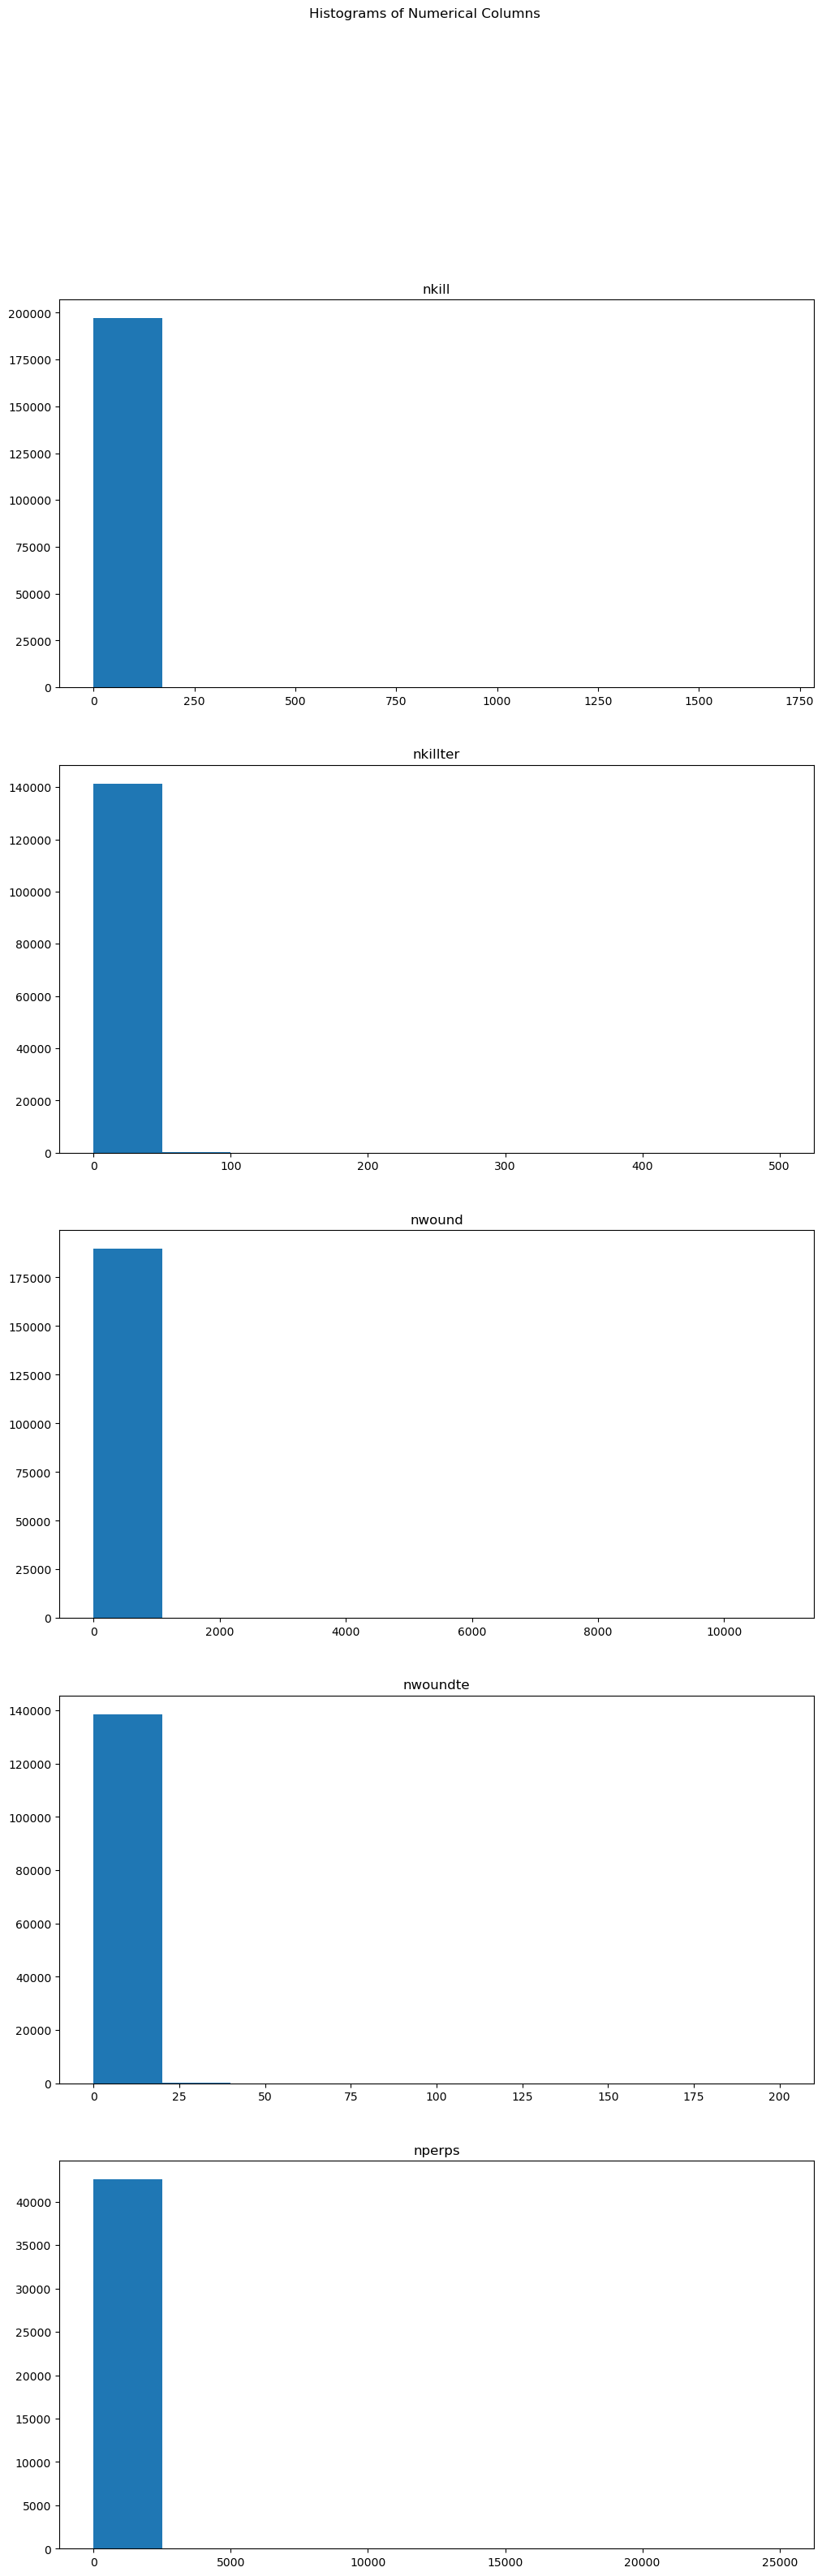

In [35]:
fig, axs = plt.subplots(5, 1, figsize=(12, 6*6))
n = 0
for col in numerical_columns:
    axs[n].hist(numerical_data[col].loc[numerical_data[col] > -1])
    axs[n].set_title(col)
    n += 1

plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [36]:
# Shapiro-Wilk test
from scipy.stats import shapiro
for column in numerical_columns:
    stat, p = shapiro(numerical_data[column].loc[numerical_data[column] > -1])
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat}, p={p}')
    if p < 0.05:
        print("The data likely does not follow a normal distribution.")
    else:
        print("The data may be normally distributed, but the q-q plot can provide further insights.")
    print()

Shapiro-Wilk Test for nkill: Statistics=0.14885014295578003, p=0.0
The data likely does not follow a normal distribution.

Shapiro-Wilk Test for nkillter: Statistics=0.09767919778823853, p=0.0
The data likely does not follow a normal distribution.

Shapiro-Wilk Test for nwound: Statistics=0.024117112159729004, p=0.0
The data likely does not follow a normal distribution.

Shapiro-Wilk Test for nwoundte: Statistics=0.05967897176742554, p=0.0
The data likely does not follow a normal distribution.

Shapiro-Wilk Test for nperps: Statistics=0.030252397060394287, p=0.0
The data likely does not follow a normal distribution.



C:\Users\kunal\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


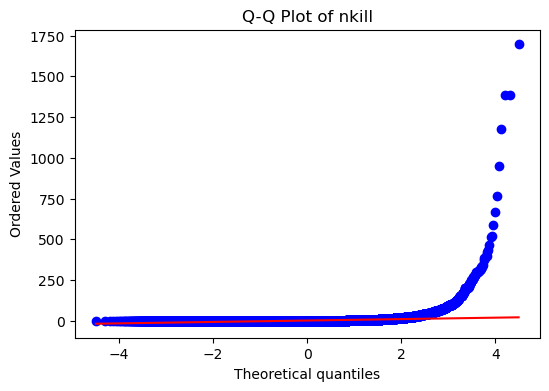

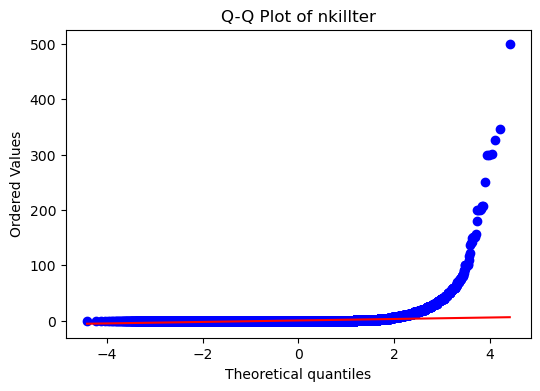

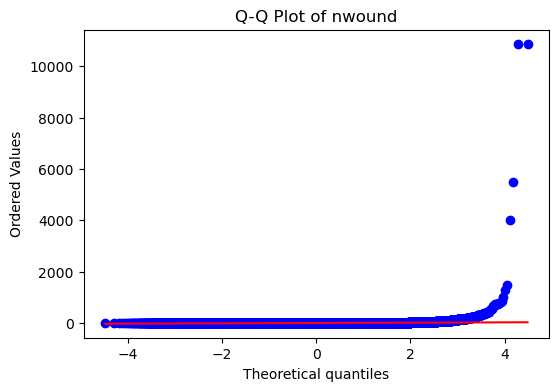

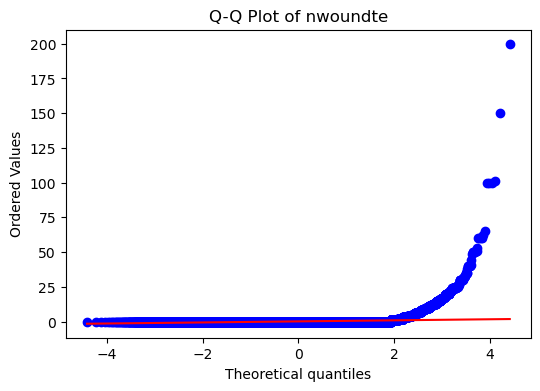

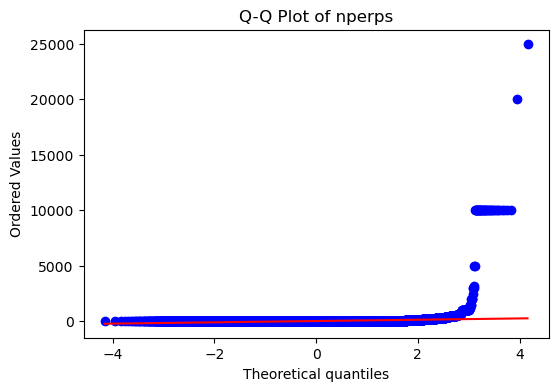

In [37]:
# Q-Q Plots
import scipy.stats as stats

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(numerical_data[column].loc[numerical_data[column] > -1], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

In [38]:
# Outlier Detection in numeric_columns ('nkill', 'nkillter', 'nwound', 'nwoundte', 'nperps')
from scipy.stats import zscore
print("- "*78)
for col in numerical_columns:
    z_scores = zscore(numerical_data[col])
    outliers = z_scores[(z_scores > 3) | (z_scores < -3)]
    print(outliers)
    print(f"Number of Outliers in \"{col}\":", outliers.count())
    print("- "*78)

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
80         4.060416
210        3.062858
2530       7.778585
3465       8.141334
4197       6.418279
            ...    
208995     7.143776
209045     5.783470
209235     3.244232
209523    19.930651
209677     3.334919
Name: nkill, Length: 1549, dtype: float64
Number of Outliers in "nkill": 1549
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
3307       4.178372
3465      23.745764
7255       3.339770
8511       3.898838
11528      5.016975
            ...    
209422     8.091851
209439     8.371385
209494     3.060236
209523     4.178372
209534     3.060236
Name: nkillter, Length: 1620, dtype: float64
Number of Outliers in "nkillter": 1620
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [39]:
# Categorical columns analysis
categorical_columns = ["country_txt","region_txt","success","suicide","attacktype1_txt","targtype1_txt","natlty1_txt","weaptype1_txt","ransom"]
categorical_data = terrdf[categorical_columns]

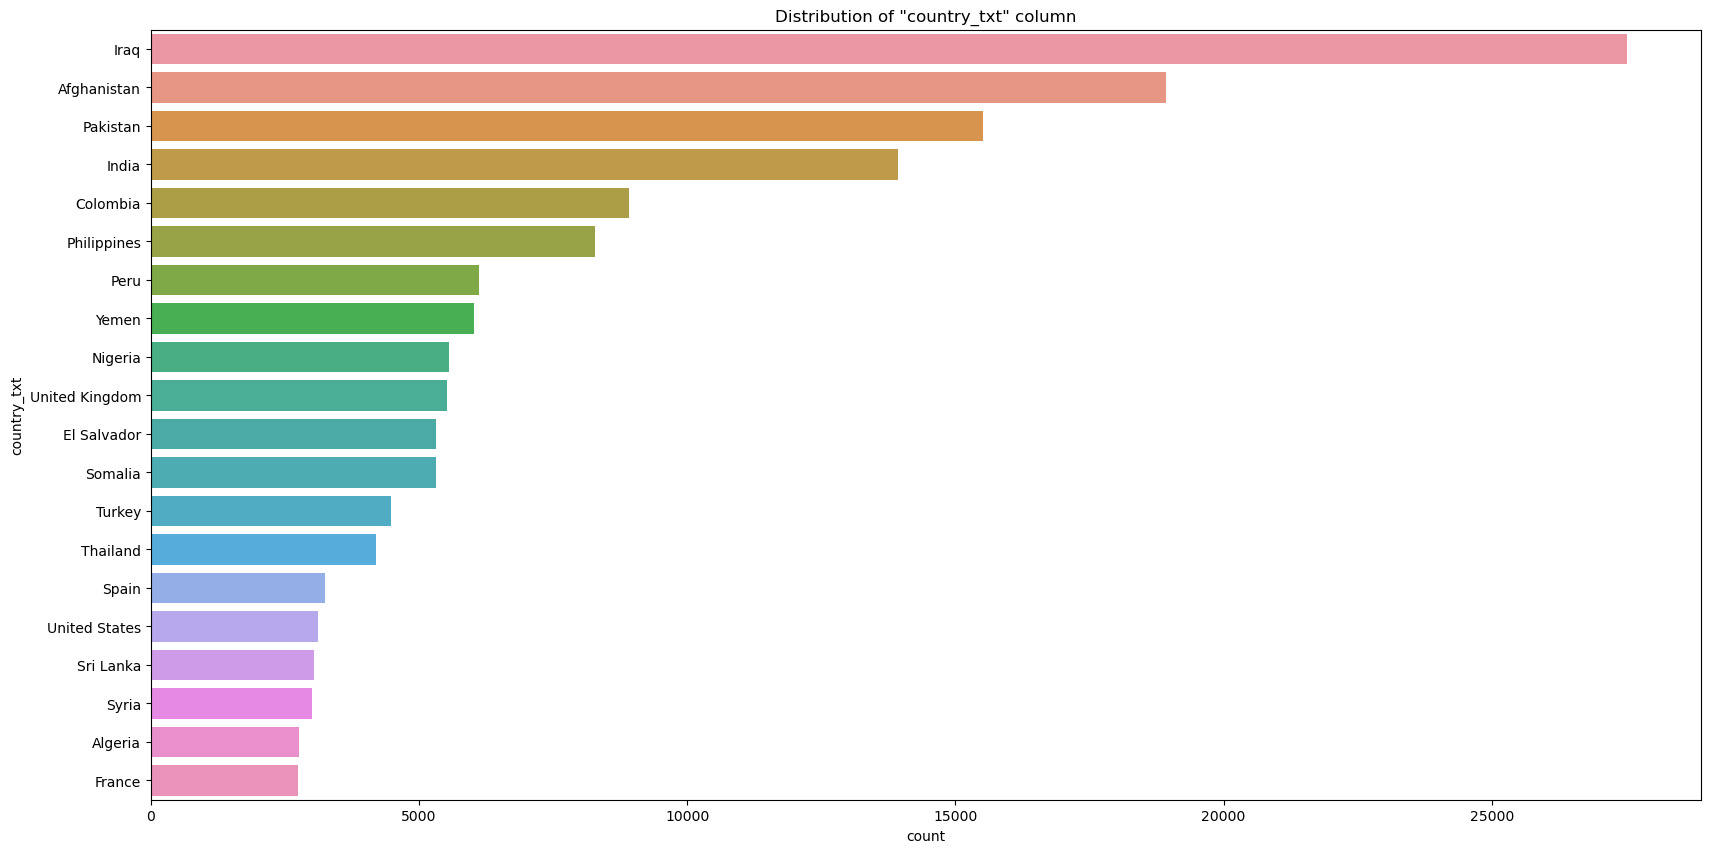

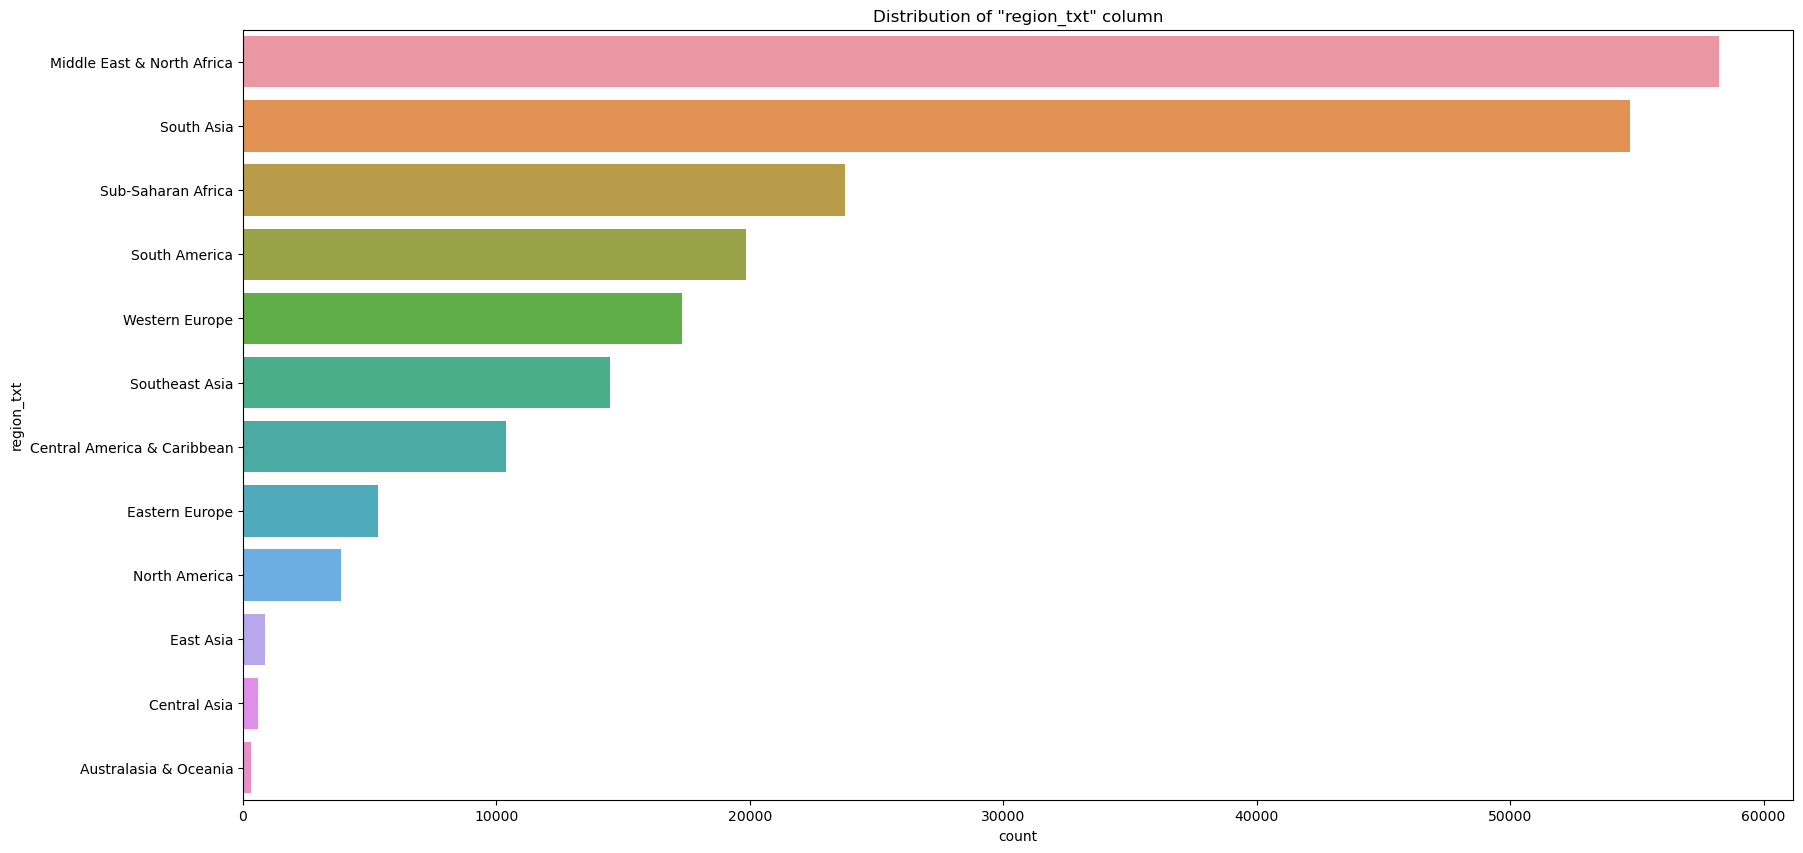

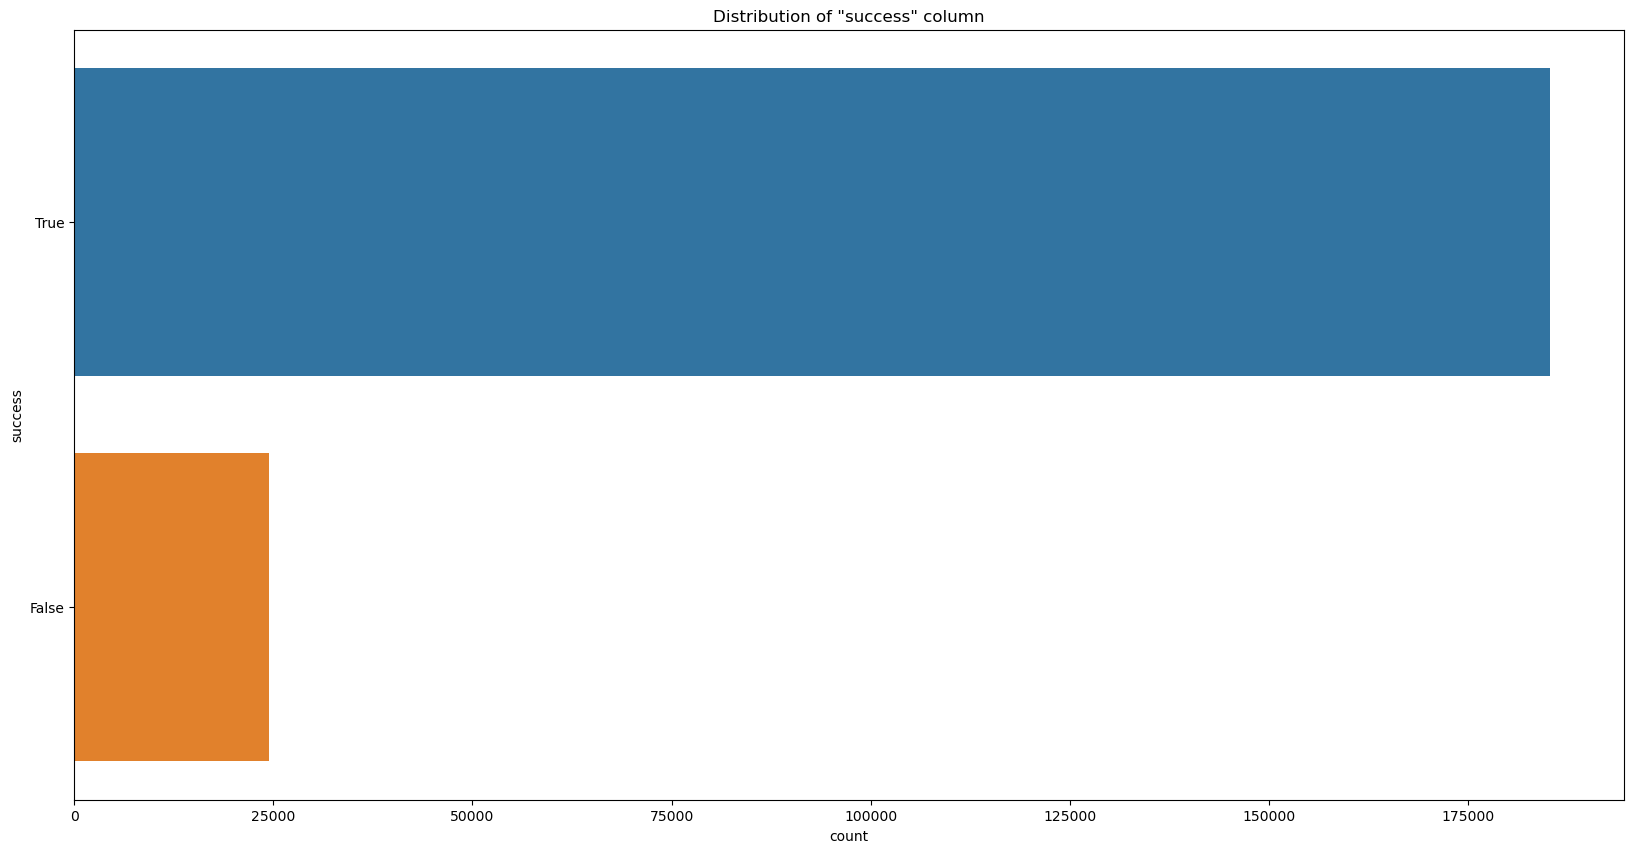

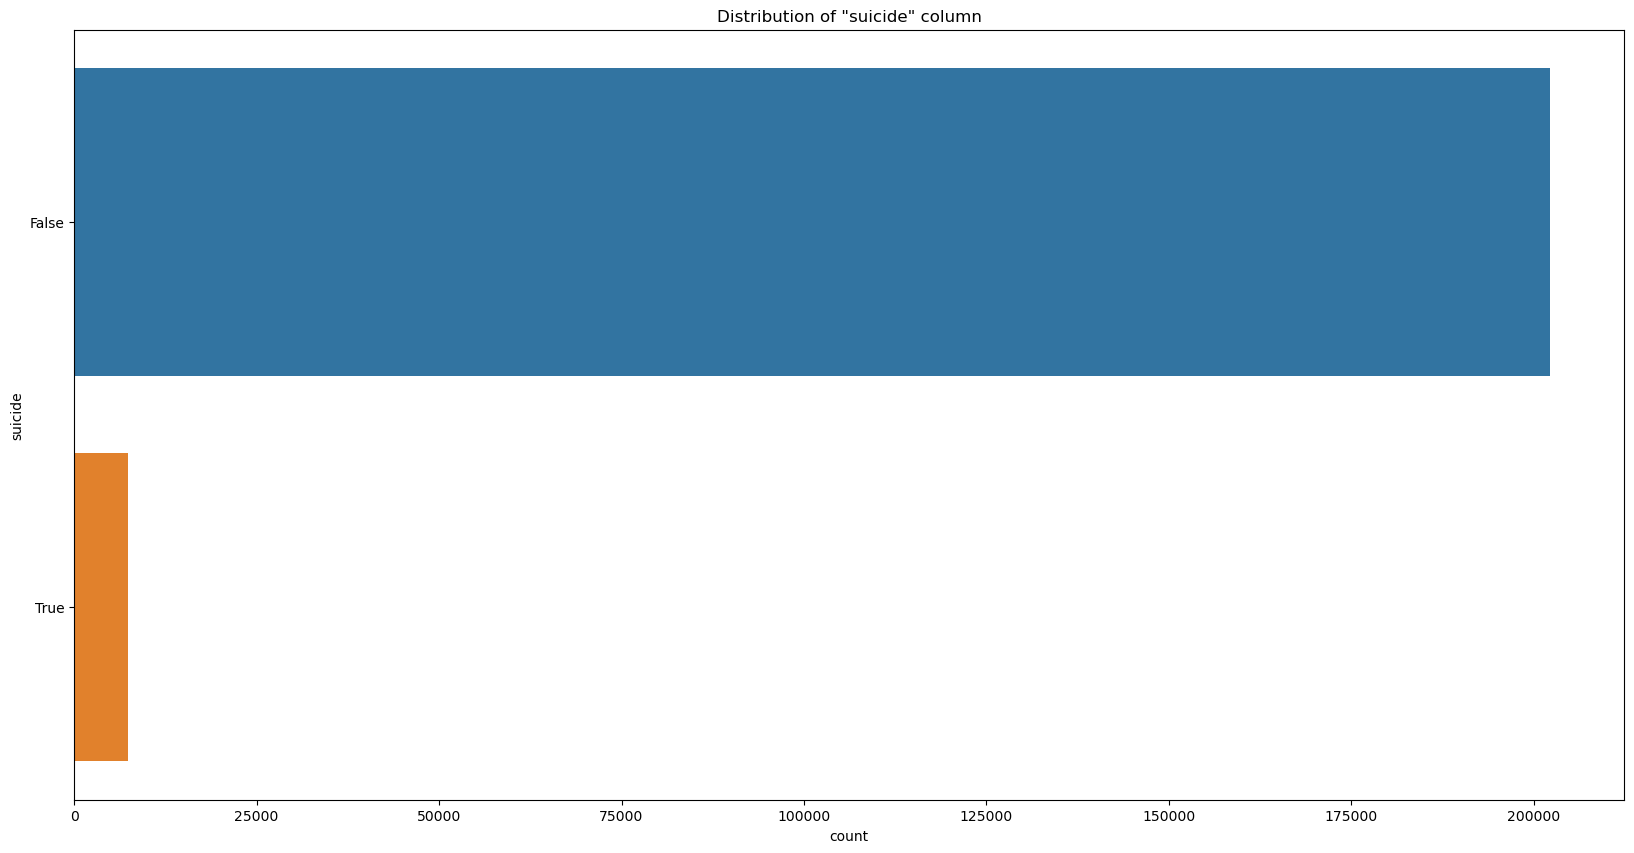

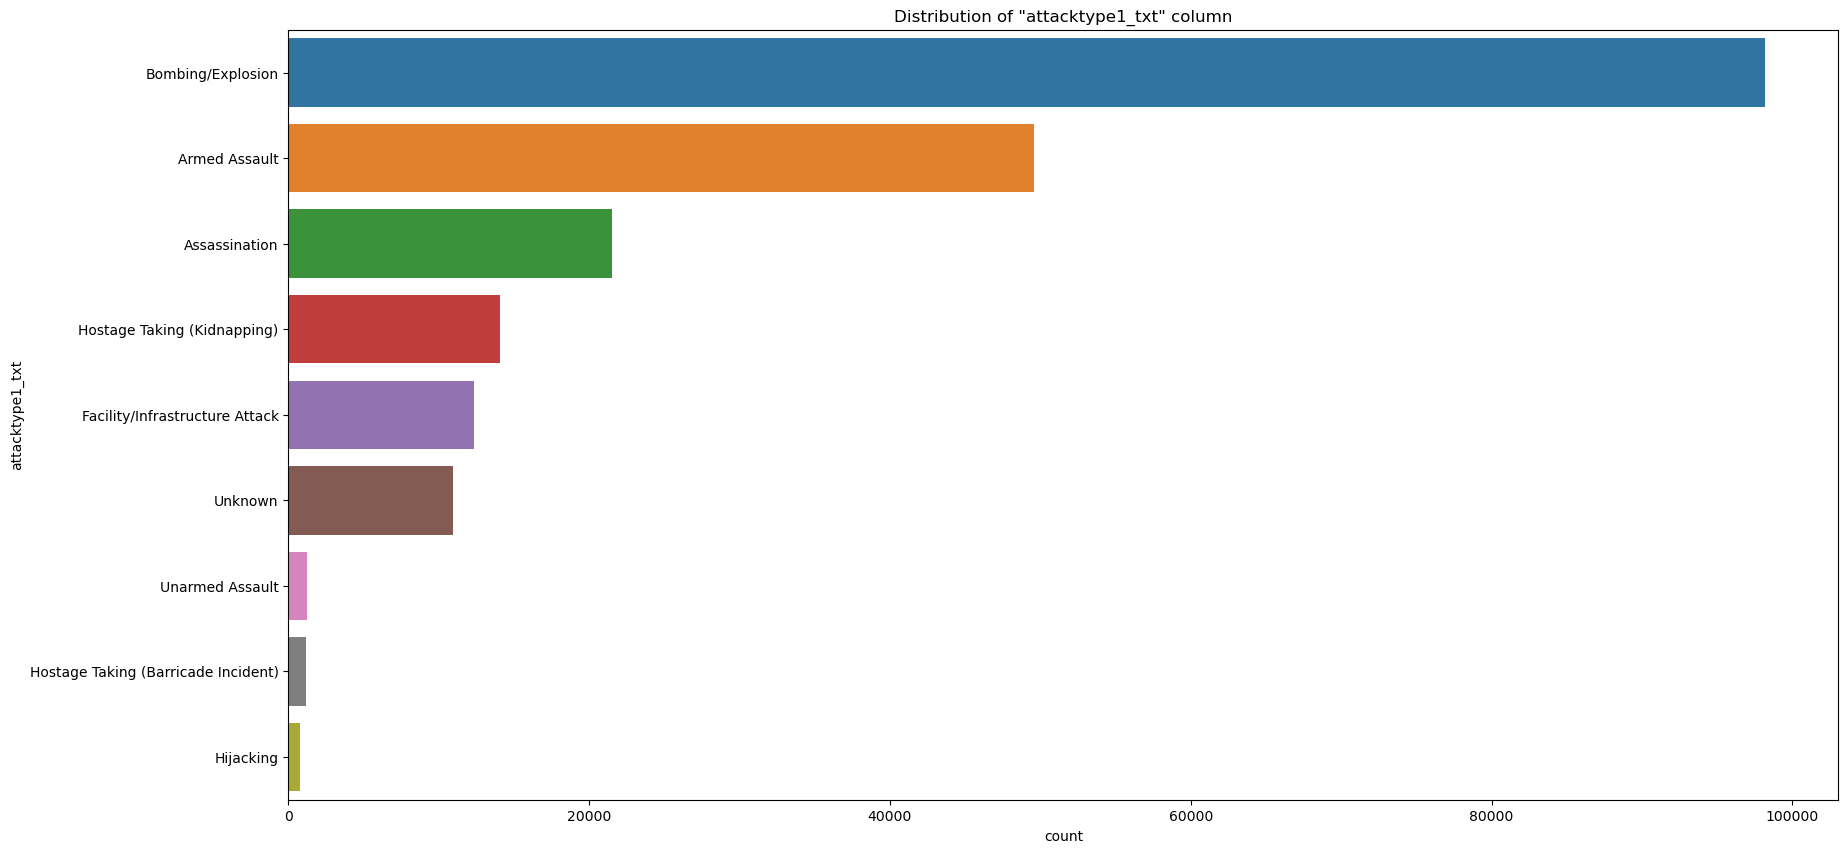

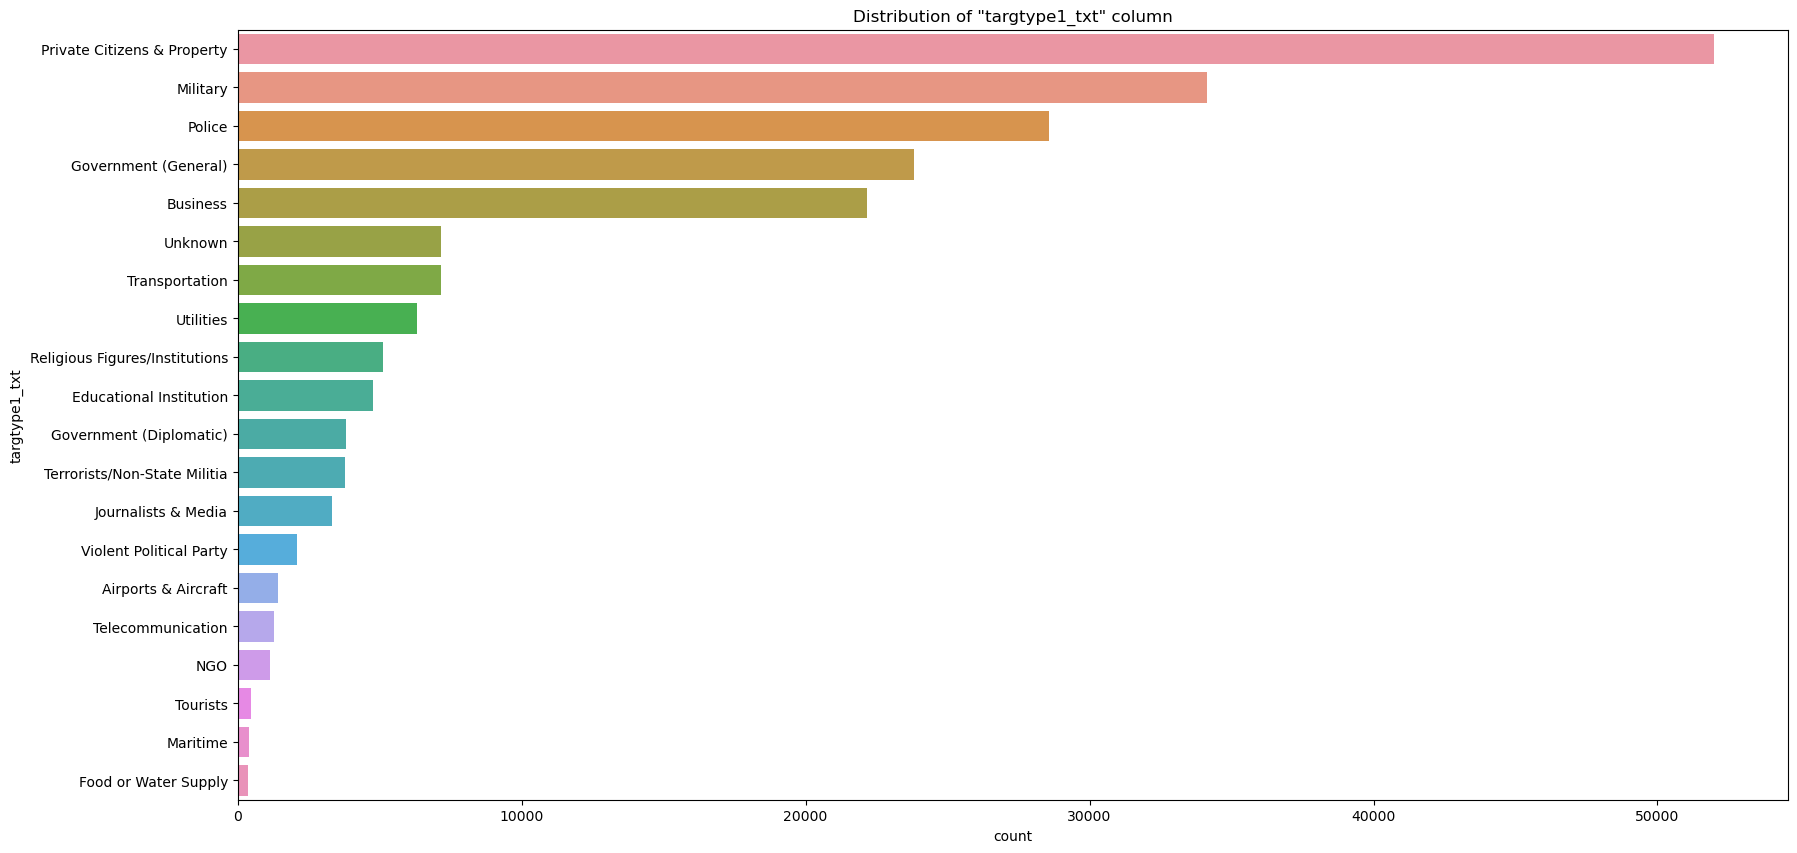

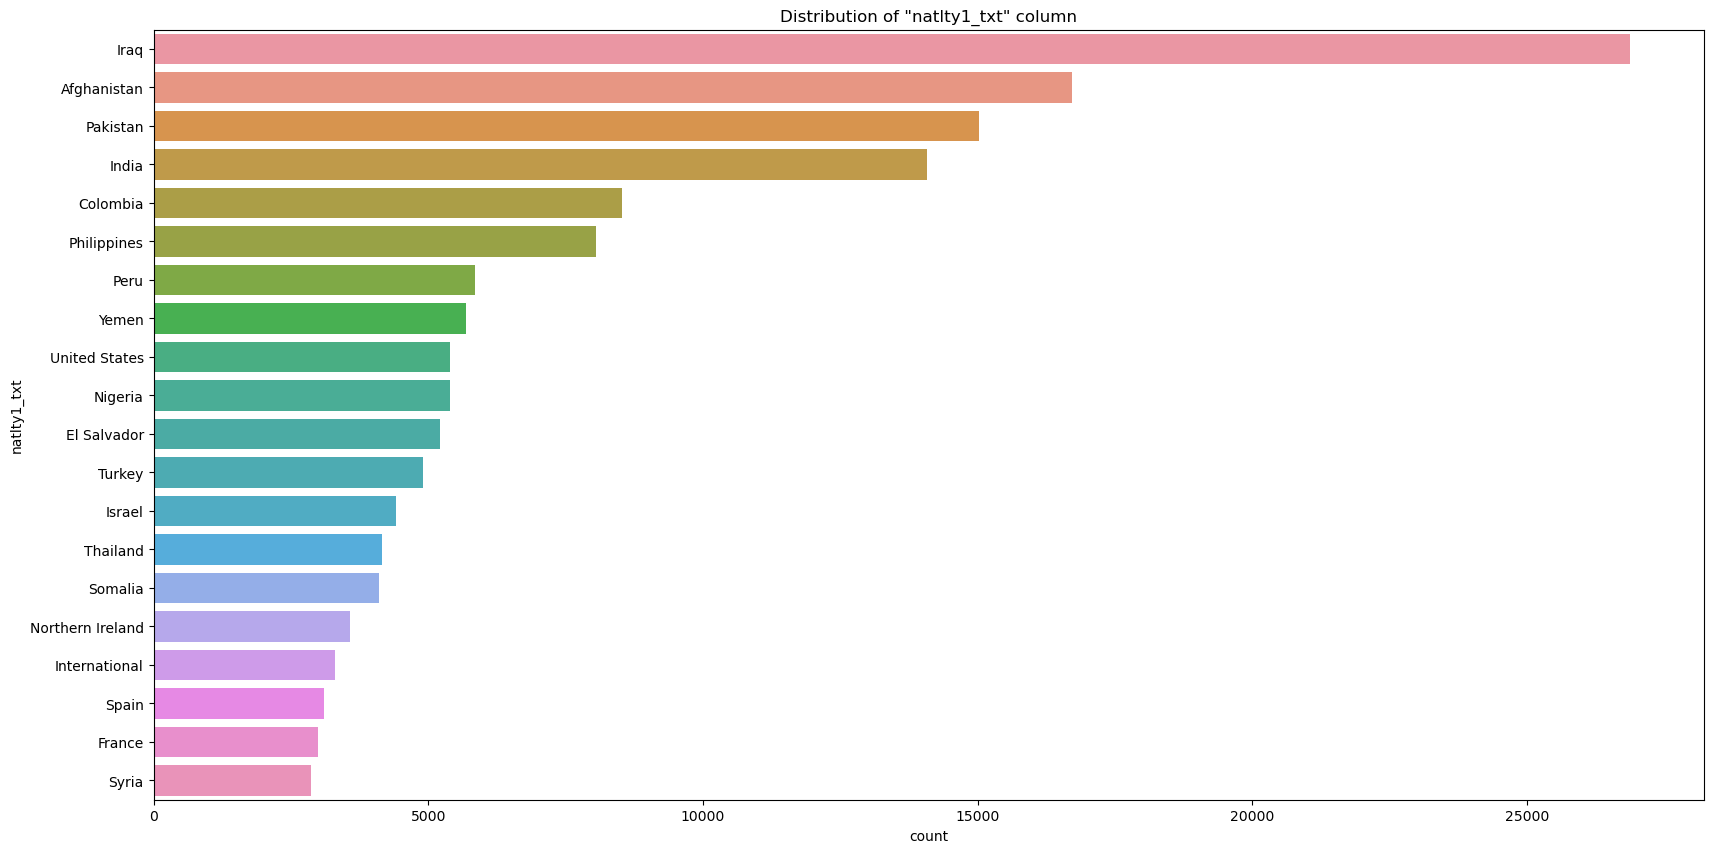

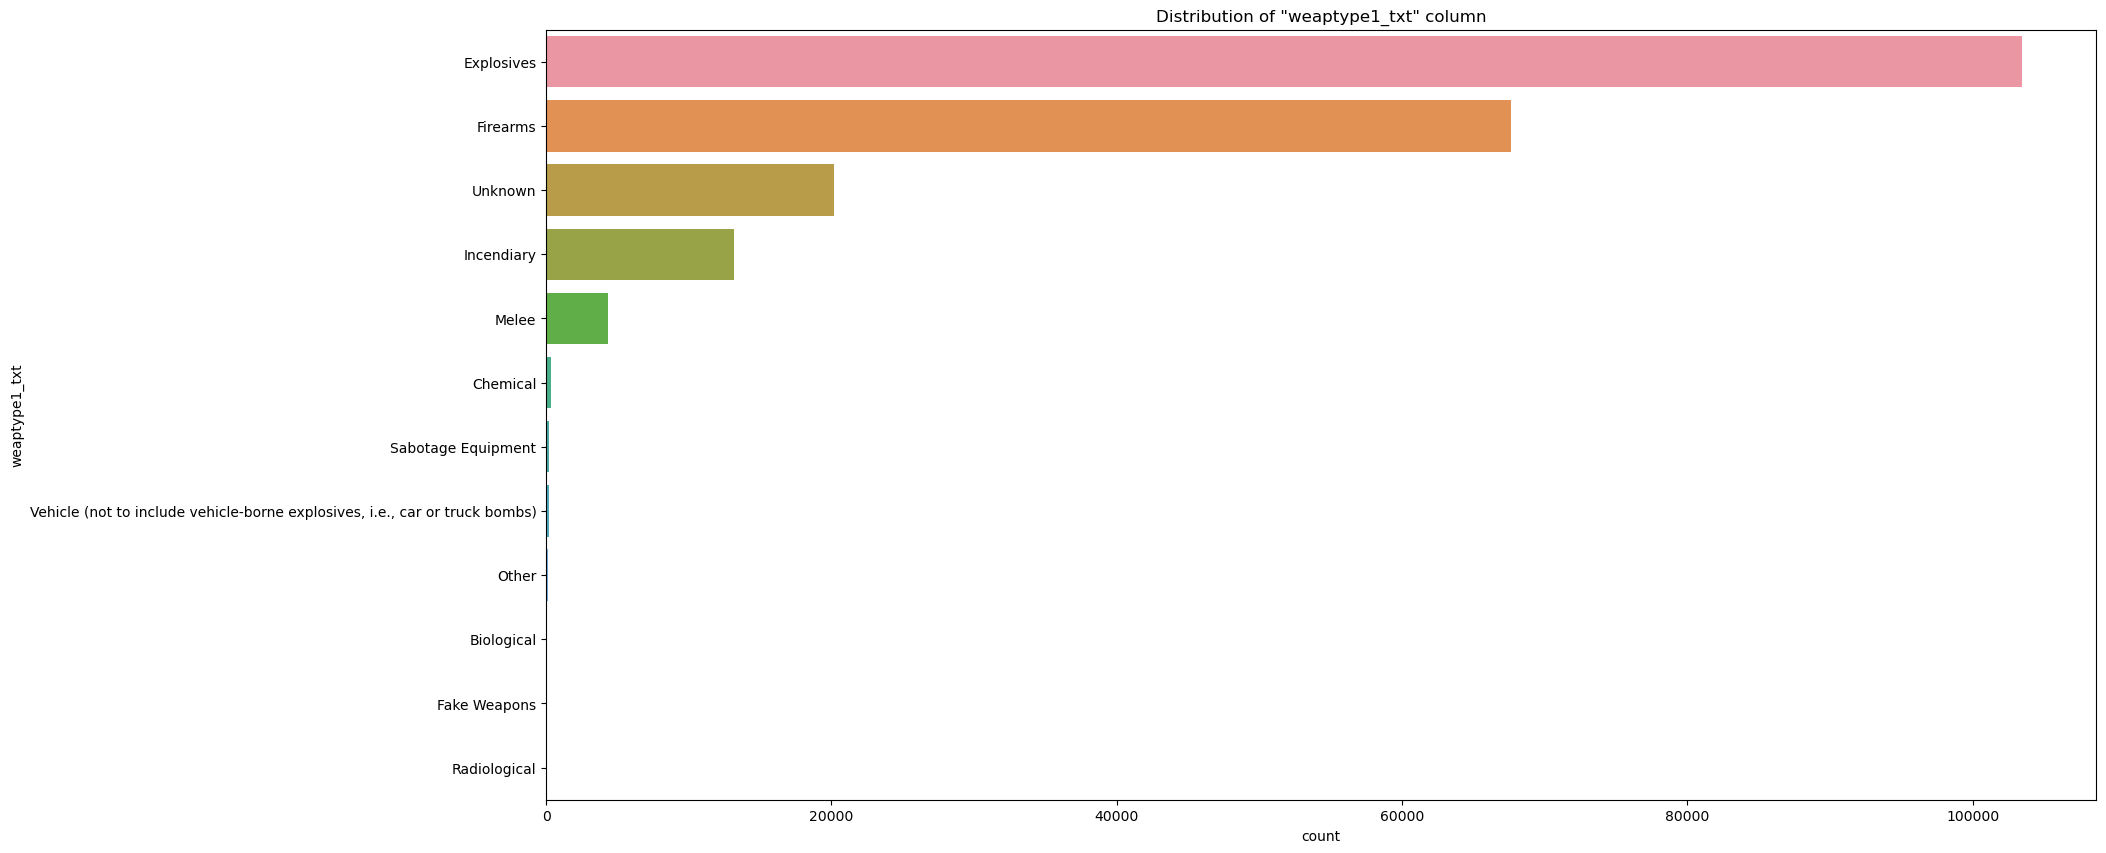

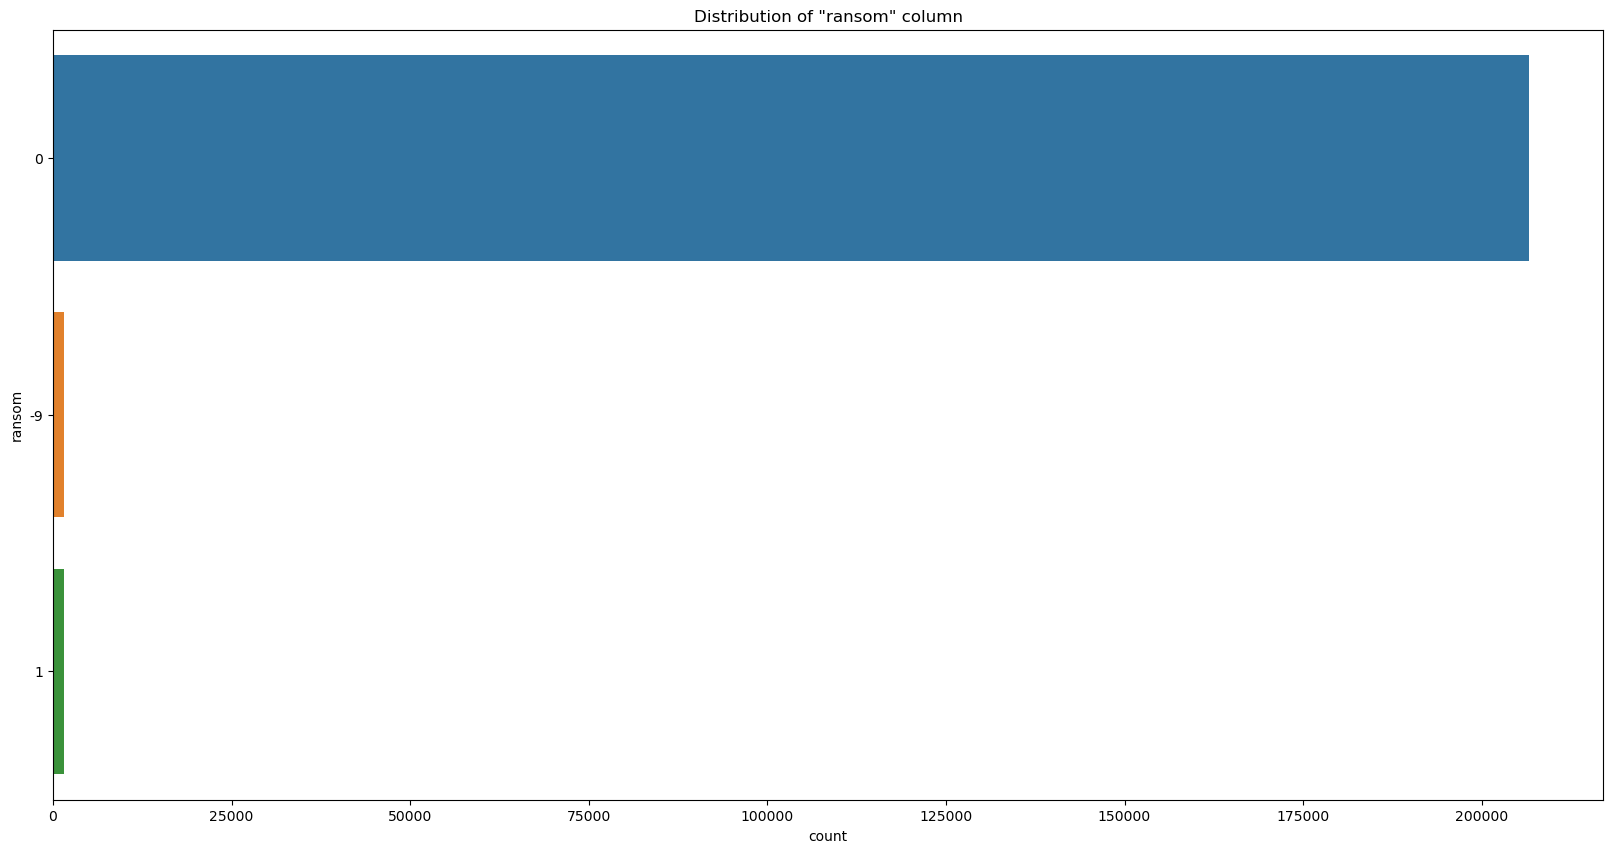

In [43]:
for col in categorical_columns:
    plt.figure(figsize=(20,10))
    sns.countplot(y=col, data=categorical_data, order=categorical_data[col].value_counts().head(20).index) # Limit the bars to top 20
    plt.title(f'Distribution of \"{col}\" column')
    plt.show()